# Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import r2_score


# Read and prepare Data

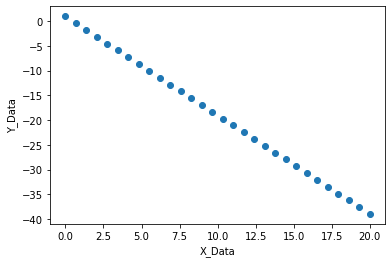

In [2]:
X_Data = np.linspace(0 , 20 , 30)
Y_Data = -2*X_Data +1
X_Data , Y_Data = sk.utils.shuffle(X_Data , Y_Data)
plt.scatter(X_Data , Y_Data)
plt.xlabel("X_Data")
plt.ylabel("Y_Data")
plt.show()

In [3]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 1))  , axis = 1)


# Batch Momentum based

In [4]:
theta = np.array([0 , 0 ])
alpha = 0.001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 10000
Gamma = 0.9
Vt = 0

    
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
    if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
            break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    
    Vt = Gamma*Vt + alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    theta = theta - Vt
    Not_first_iter+=1
    
print(theta)      

[-1.78931552 -1.78931552]


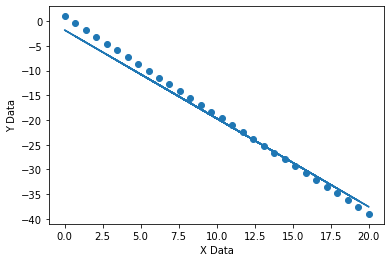

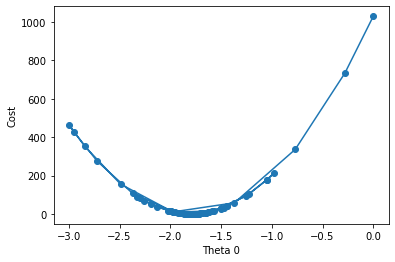

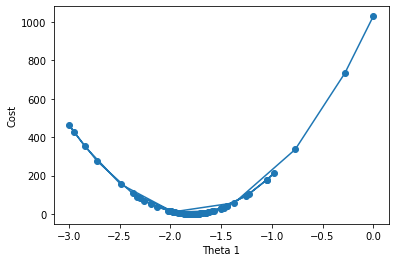

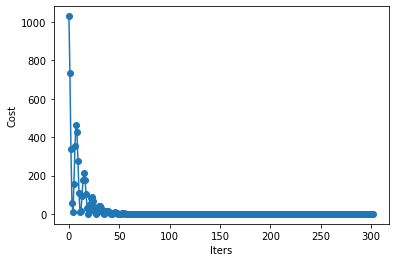

In [5]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# NAG Algorithm (Batch Momentum based Improving)

In [6]:
theta = np.array([0 , 0 ])
alpha = 0.001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 10000

Gamma = 0.09
Vt = 0
Theta_Tmp = np.array([0 , 0 ])
for i in range(Max_no_iter):
    if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
            break
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    
    Y= np.dot(Theta_Tmp ,feture.T)
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    
    Theta_Tmp = theta - Gamma*Vt
    theta = Theta_Tmp - alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    Vt = Gamma*Vt + alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    
print(theta)   



[-1.78931533 -1.78931533]


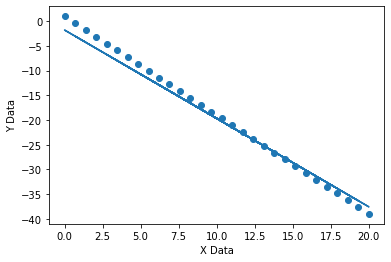

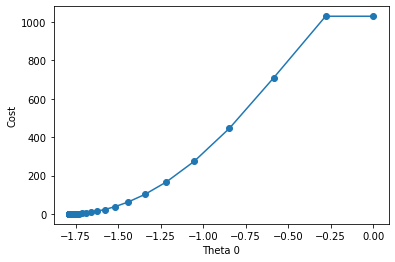

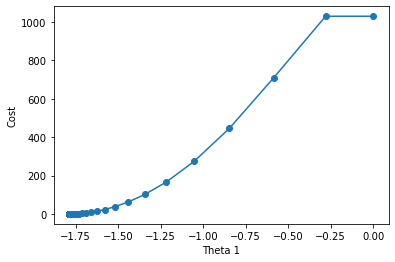

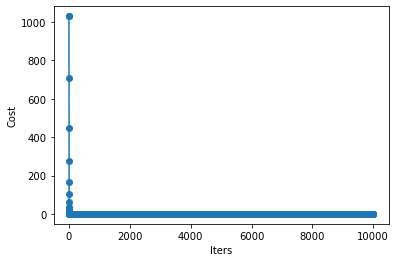

In [7]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Adagrad Algorithm

In [8]:
theta = np.array([0 , 0 ])
alpha = 0.1
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []

theta_zero = []
theta_one = []
Max_no_iter = 10000

Vt = 0
epslon = 1e-8
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
    if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
            break
    Not_first_iter+=1        
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    
    Vt = Vt + ((np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length))**2
    theta = theta - (alpha/np.sqrt(Vt+epslon))*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    
    
print(theta)   

[-1.78931533 -1.78931533]


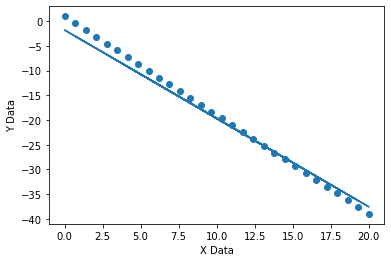

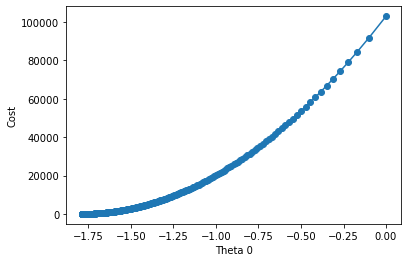

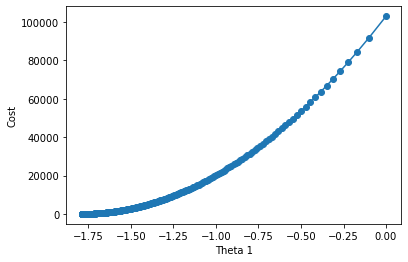

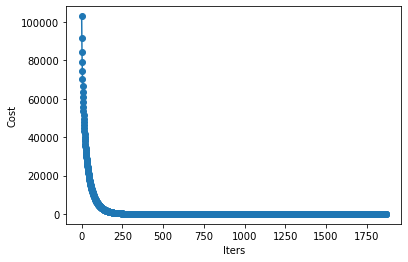

In [9]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# RMSProp Algorithm

In [10]:
theta = np.array([0 , 0 ])
alpha = 0.1
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 1000

Vt = 0
epslon = 1e-8
Beta = 0.4
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
    if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
            break
    Not_first_iter+=1 
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    
    Vt = Beta*Vt + (1-Beta)*((np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length))**2
    theta = theta - (alpha/np.sqrt(Vt+epslon))*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    
    
print(theta)

[-1.73931533 -1.73931533]


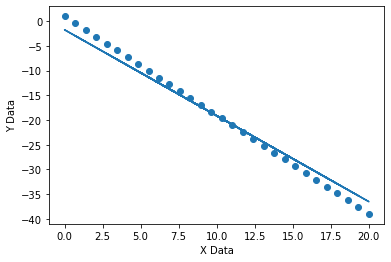

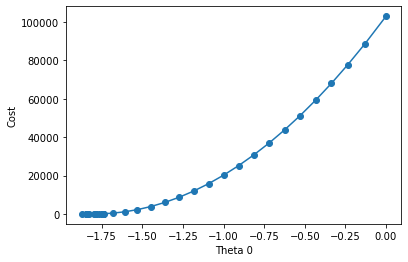

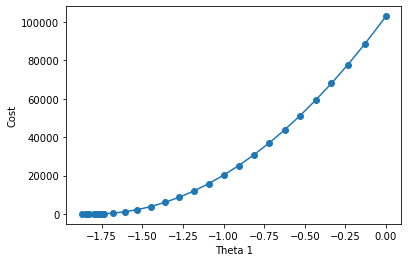

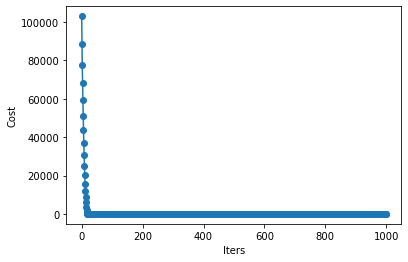

In [11]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Adam Algorithm

In [12]:
theta = np.array([0 , 0 ])
alpha = 0.01
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 1000

Mt = 0
Vt = 0
Mt_hat = 0
Vt_hat = 0
epslon = 1e-8
Beta_1 = 0.2
Beta_2 = 0.9
for i in range(Max_no_iter):
    Y= np.dot(theta ,feture.T)
    if Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 5e-9:
            break
    Not_first_iter+=1 
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    
    Mt = Beta_1*Mt + (1-Beta_1)*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    Vt = Beta_2*Vt + (1-Beta_2)*((np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length))**2
    Mt_hat = Mt/(1-Beta_1)
    Vt_hat = Vt/(1-Beta_2)
    theta = theta - (alpha/np.sqrt(Vt_hat+epslon))*Mt_hat
    
    
print(theta) 



[-1.78931533 -1.78931533]


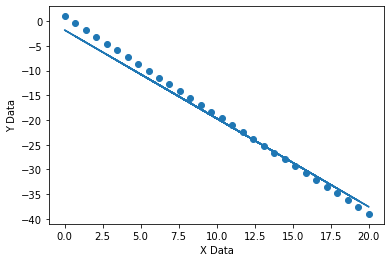

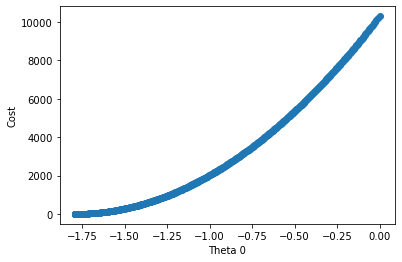

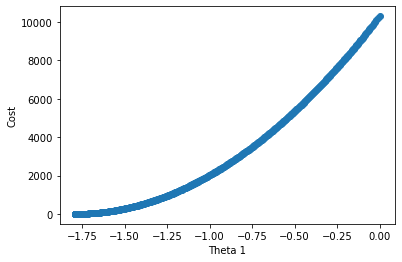

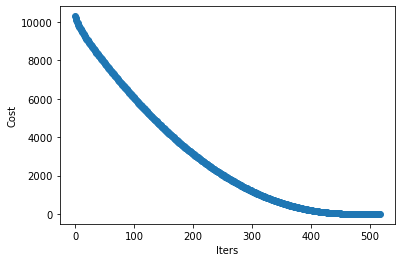

In [13]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()